In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [5]:
df = pd.read_csv(r'C:\Users\DNC-PC-138\Desktop\Alura\COVID\brazil_covid19.csv')

In [6]:
df.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0


In [7]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

In [8]:
df.describe()

,cases,deaths
count,1.225800e+04,12258.000000
mean,2.085151e+05,5701.935308
std,3.281497e+05,10238.310905
min,0.000000e+00,0.000000
25%,2.184225e+04,558.250000
50%,1.065500e+05,2627.000000
75%,2.524558e+05,6534.000000
max,3.188105e+06,107614.000000


In [68]:
df.corr()

C:\Users\DNC-PC-138\AppData\Local\Temp\ipykernel_5660\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,cases,deaths,month,year,increase_cases,acceleration_cases,increase_deaths,acceleration_deaths
cases,1.000000,0.940322,-0.087330,0.460261,0.489839,0.305025,0.359856,0.143066
deaths,0.940322,1.000000,-0.044369,0.356918,0.496588,0.288545,0.470547,0.175672
month,-0.087330,-0.044369,1.000000,-0.634887,0.000031,0.000022,-0.000022,0.000020
year,0.460261,0.356918,-0.634887,1.000000,0.000086,-0.000037,0.000089,-0.000057
increase_cases,0.489839,0.496588,0.000031,0.000086,1.000000,0.879813,0.895015,0.701057
acceleration_cases,0.305025,0.288545,0.000022,-0.000037,0.879813,1.000000,0.815272,0.903784
increase_deaths,0.359856,0.470547,-0.000022,0.000089,0.895015,0.815272,1.000000,0.806631
acceleration_deaths,0.143066,0.175672,0.000020,-0.000057,0.701057,0.903784,0.806631,1.000000


In [10]:
df.date = pd.to_datetime(df.date)

In [11]:
df['month'] = df['date'].dt.month

In [12]:
df['year'] = df['date'].dt.year

In [13]:
df.head()

,date,region,state,cases,deaths,month,year
0,2020-02-25,Centro-Oeste,DF,0.0,0,2,2020
1,2020-02-25,Centro-Oeste,GO,0.0,0,2,2020
2,2020-02-25,Centro-Oeste,MS,0.0,0,2,2020
3,2020-02-25,Centro-Oeste,MT,0.0,0,2,2020
4,2020-02-25,Nordeste,AL,0.0,0,2,2020


<AxesSubplot: xlabel='year', ylabel='cases'>

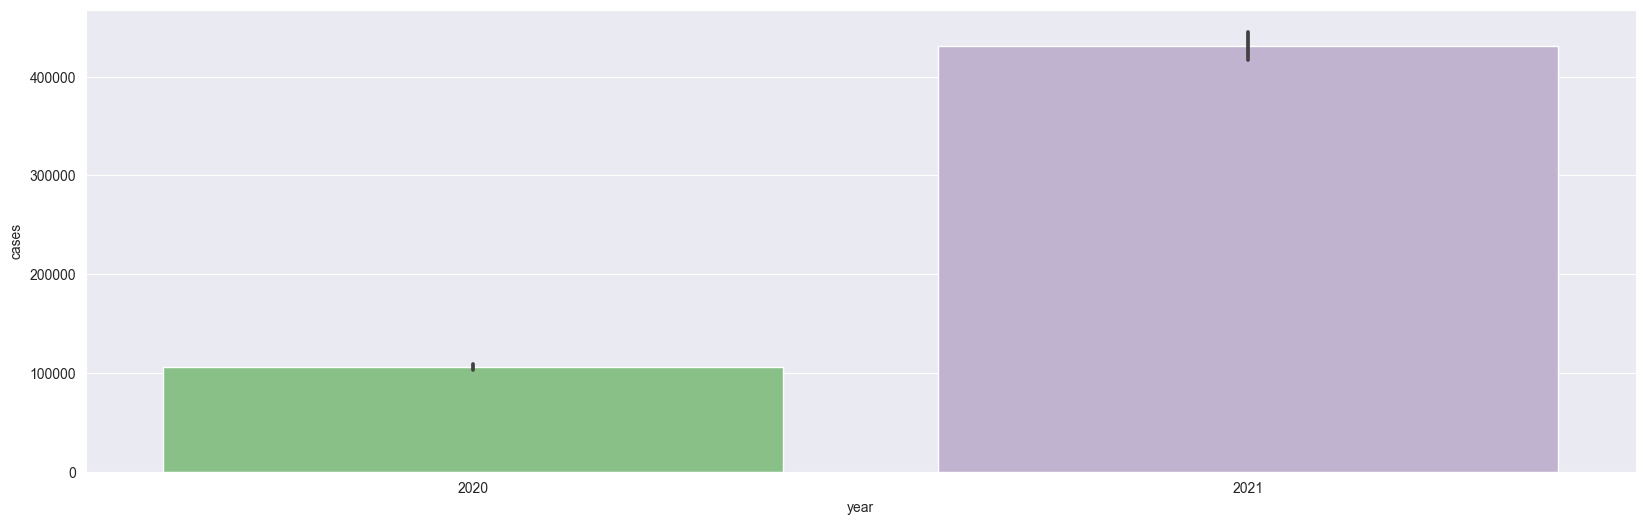

In [14]:
plt.subplots(figsize = (20,6))
sns.barplot(data = df, x = 'year', y= 'cases')

Análise dos casos e morte de covid no ano de 2020. Para essa análise, levaremos em considerações os seguintes pontos
- Análise de crescimento de casos mês a mês
- Análise de crescimento de mortes mês a mês
- Análise de aumento de casos mês a mês
- Análise de aumento de mortes mês a mês
- Análise de aceleração de casos mês a mês
- Análise de aceleração de casos mês a mês


<AxesSubplot: xlabel='date', ylabel='cases'>

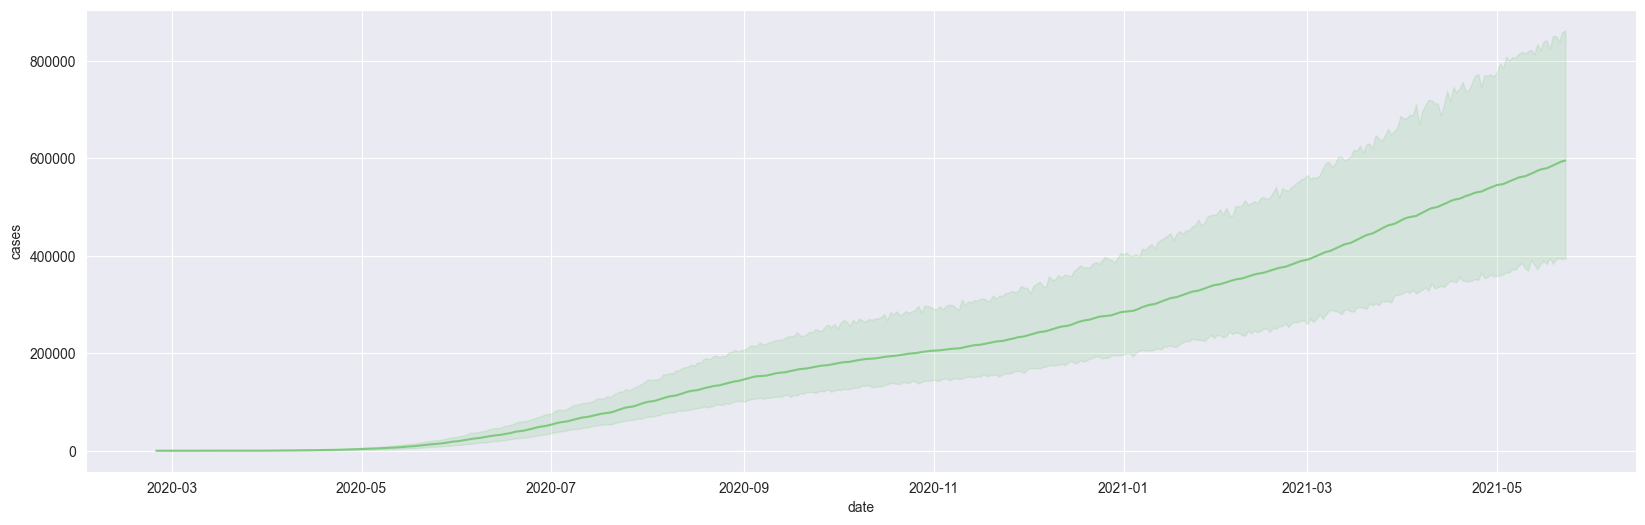

In [15]:

plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'date', y= 'cases')



<AxesSubplot: xlabel='date', ylabel='deaths'>

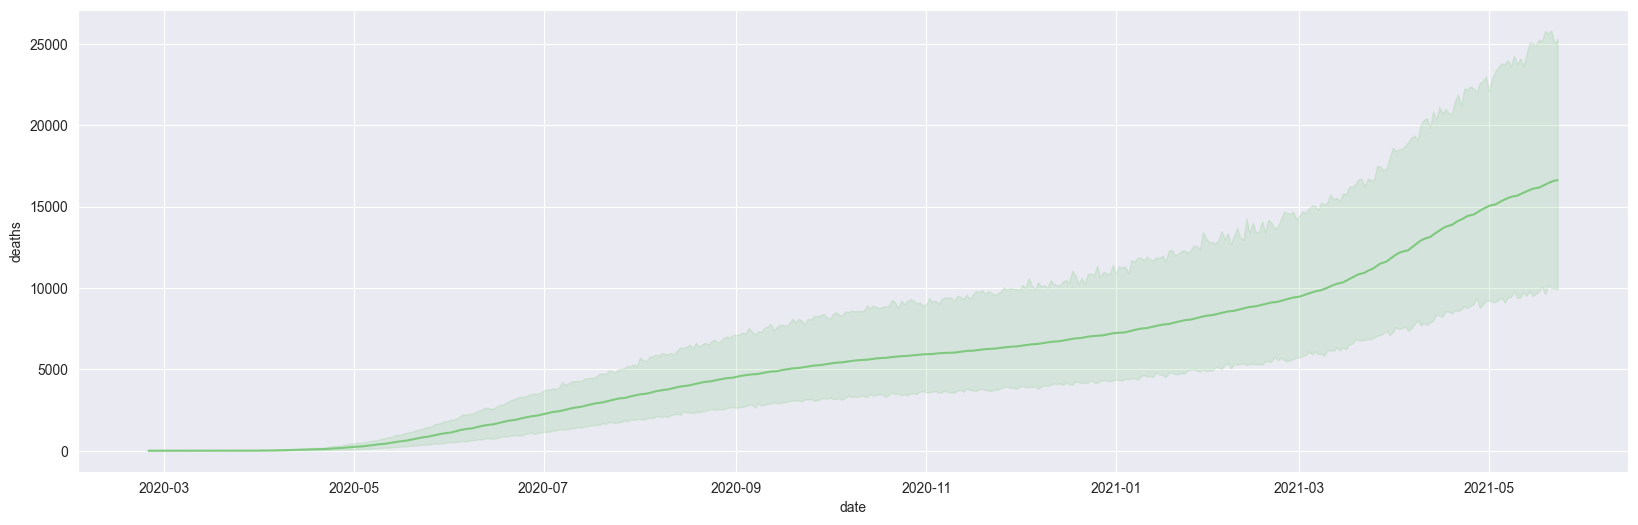

In [16]:

plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'date', y= 'deaths')

In [17]:
df['increase_cases'] = df['cases'].diff()

In [18]:
df['acceleration_cases'] = df['increase_cases'].diff()

In [19]:
df['increase_deaths'] = df['deaths'].diff()

In [20]:
df['acceleration_deaths'] = df['increase_deaths'].diff()

In [21]:
df.tail()

,date,region,state,cases,deaths,month,year,increase_cases,acceleration_cases,increase_deaths,acceleration_deaths
12253,2021-05-23,Sudeste,RJ,840480.0,49515,5,2021,-675802.0,-1722064.0,10429.0,-18145.0
12254,2021-05-23,Sudeste,SP,3188105.0,107614,5,2021,2347625.0,3023427.0,58099.0,47670.0
12255,2021-05-23,Sul,PR,1060683.0,25506,5,2021,-2127422.0,-4475047.0,-82108.0,-140207.0
12256,2021-05-23,Sul,RS,1059990.0,27419,5,2021,-693.0,2126729.0,1913.0,84021.0
12257,2021-05-23,Sul,SC,947810.0,14822,5,2021,-112180.0,-111487.0,-12597.0,-14510.0


<AxesSubplot: xlabel='date', ylabel='increase_cases'>

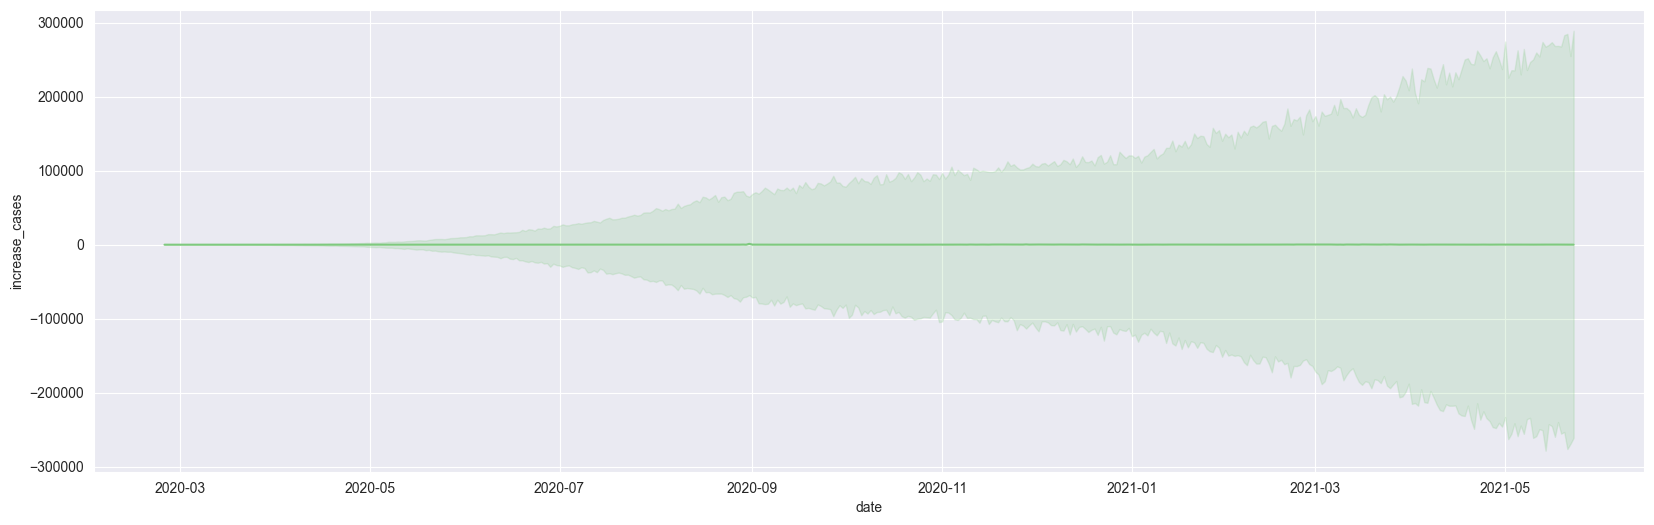

In [22]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'date', y= 'increase_cases')

<AxesSubplot: xlabel='date', ylabel='acceleration_cases'>

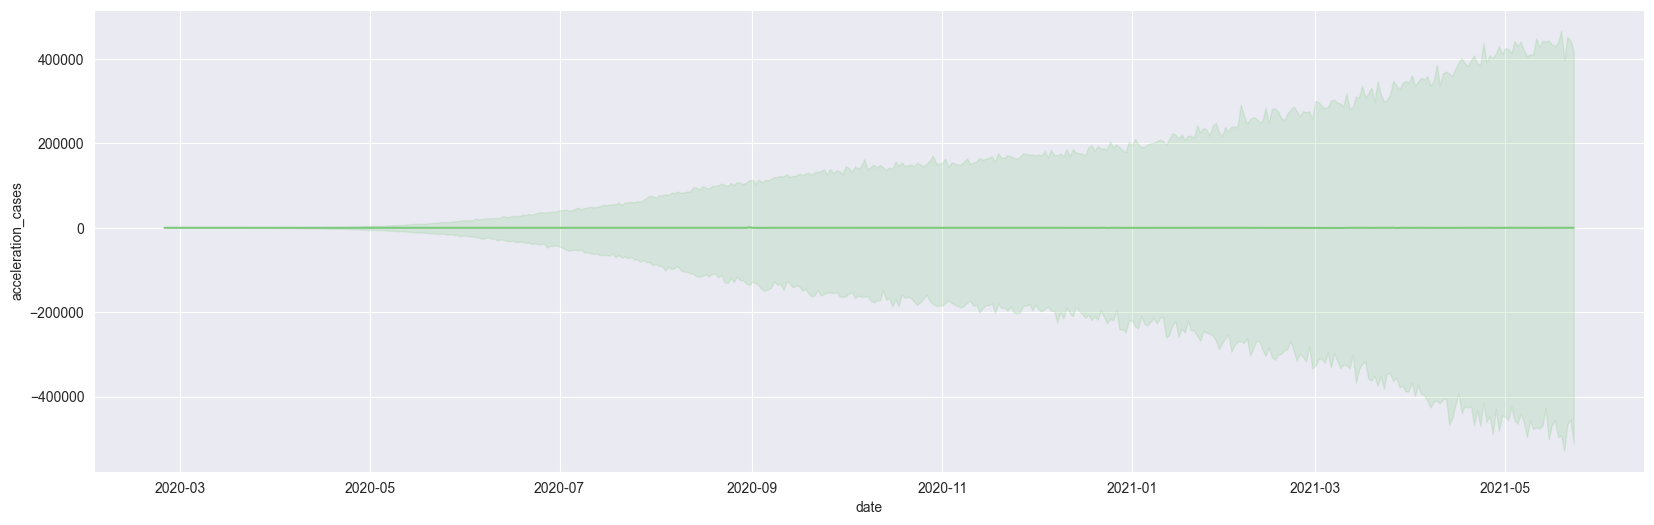

In [23]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'date', y= 'acceleration_cases')


<AxesSubplot: xlabel='date', ylabel='increase_deaths'>

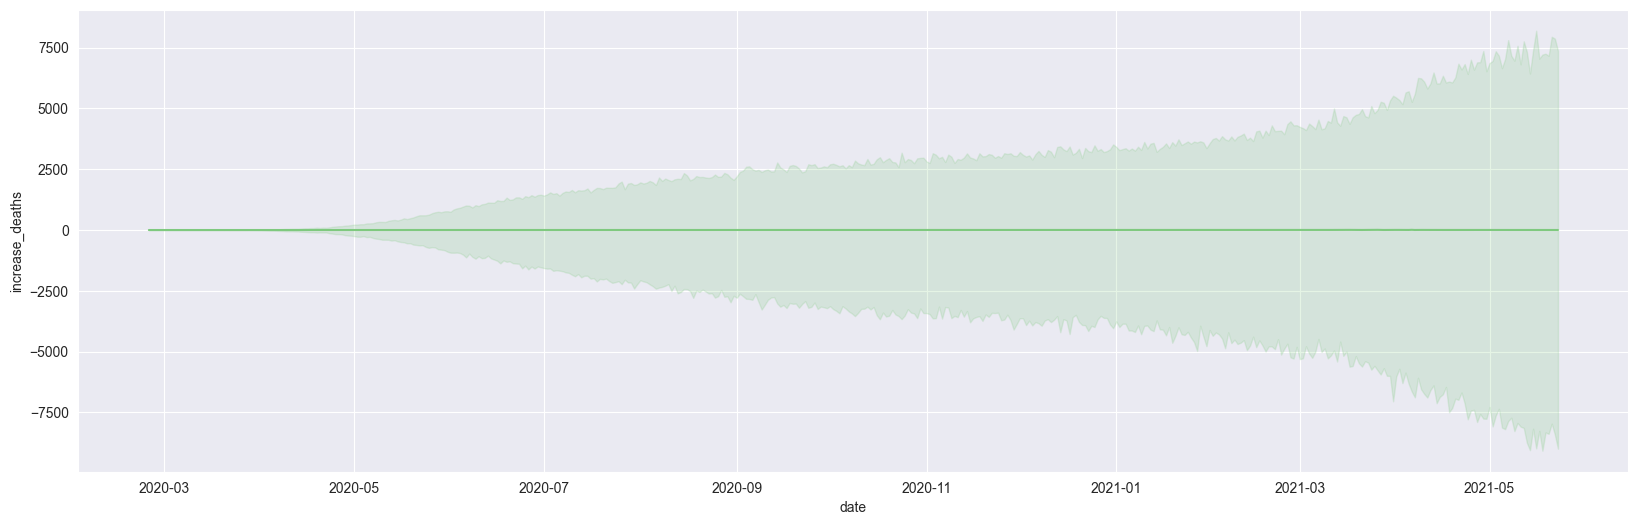

In [24]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'date', y= 'increase_deaths')


<AxesSubplot: xlabel='date', ylabel='acceleration_deaths'>

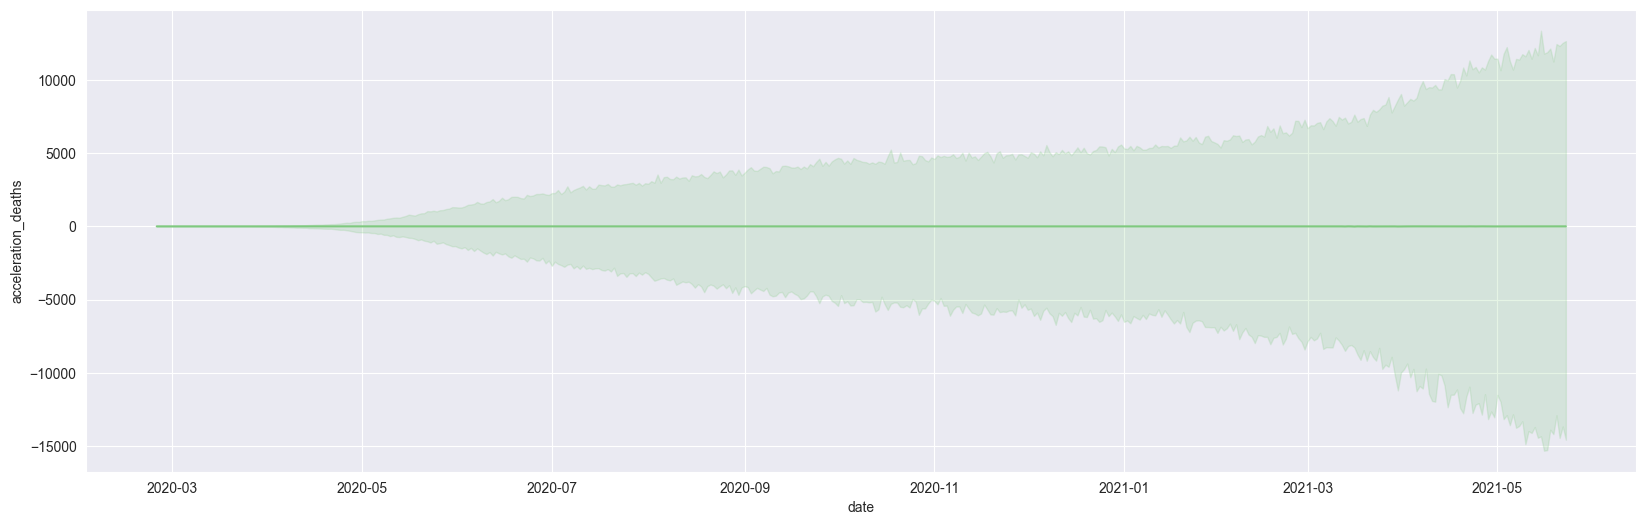

In [25]:
plt.subplots(figsize = (20,6))
sns.lineplot(data = df, x = 'date', y= 'acceleration_deaths')


In [26]:
df.head()

,date,region,state,cases,deaths,month,year,increase_cases,acceleration_cases,increase_deaths,acceleration_deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0,2,2020,NaN,NaN,NaN,NaN
1,2020-02-25,Centro-Oeste,GO,0.0,0,2,2020,0.0,NaN,0.0,NaN
2,2020-02-25,Centro-Oeste,MS,0.0,0,2,2020,0.0,0.0,0.0,0.0
3,2020-02-25,Centro-Oeste,MT,0.0,0,2,2020,0.0,0.0,0.0,0.0
4,2020-02-25,Nordeste,AL,0.0,0,2,2020,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='region', ylabel='cases'>

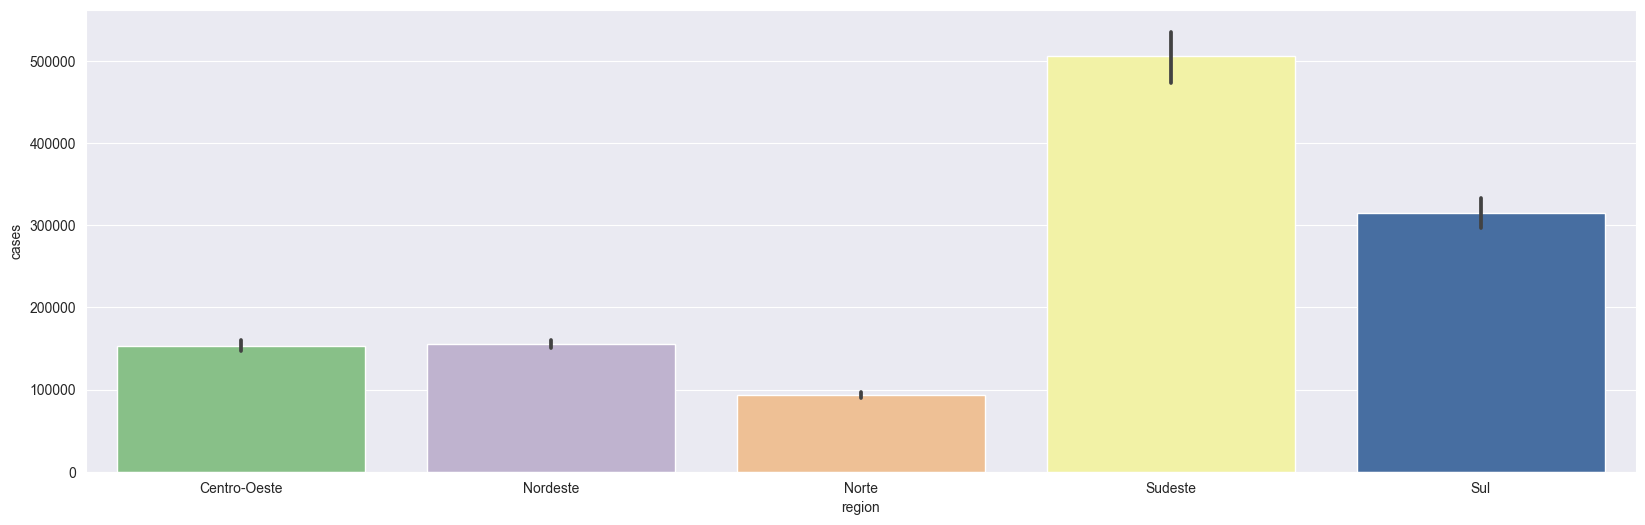

In [27]:
plt.subplots(figsize = (20,6))
sns.barplot(data = df, x = 'region', y= 'cases')


In [38]:
df.head()

,date,region,state,cases,deaths,month,year,increase_cases,acceleration_cases,increase_deaths,acceleration_deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0,2,2020,NaN,NaN,NaN,NaN
1,2020-02-25,Centro-Oeste,GO,0.0,0,2,2020,0.0,NaN,0.0,NaN
2,2020-02-25,Centro-Oeste,MS,0.0,0,2,2020,0.0,0.0,0.0,0.0
3,2020-02-25,Centro-Oeste,MT,0.0,0,2,2020,0.0,0.0,0.0,0.0
4,2020-02-25,Nordeste,AL,0.0,0,2,2020,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='region', ylabel='deaths'>

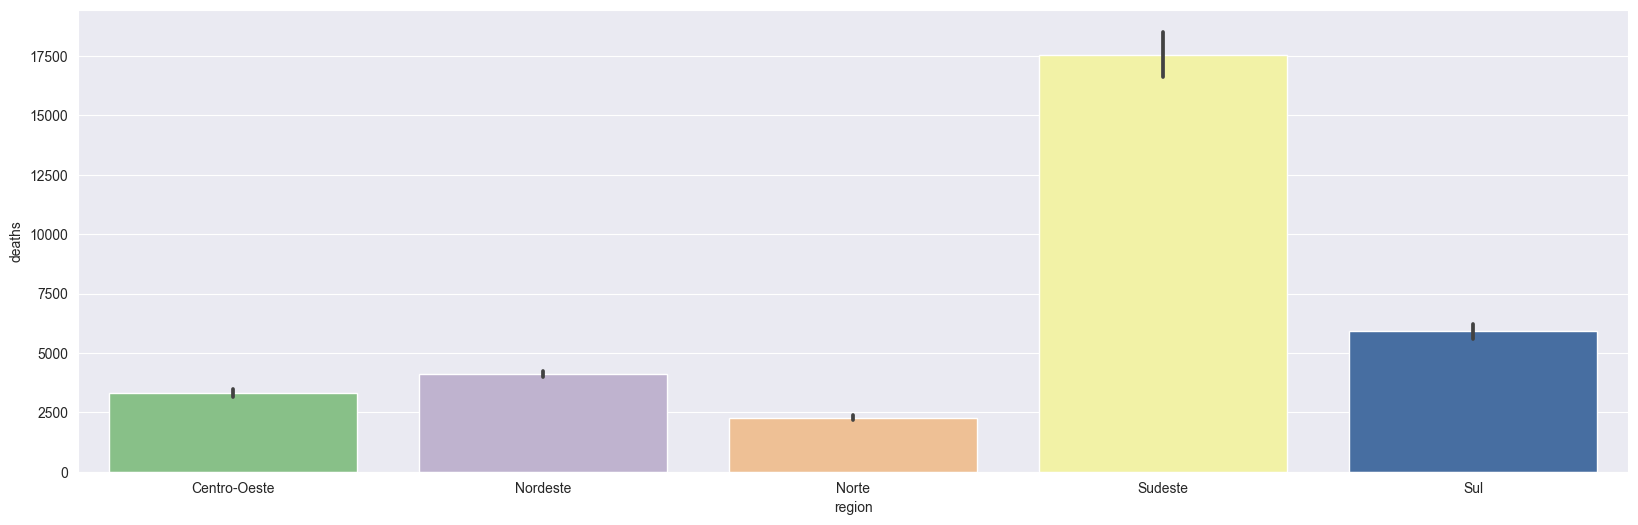

In [31]:
plt.subplots(figsize = (20,6))
sns.barplot(data = df, x = 'region', y= 'deaths')

<AxesSubplot: xlabel='state', ylabel='cases'>

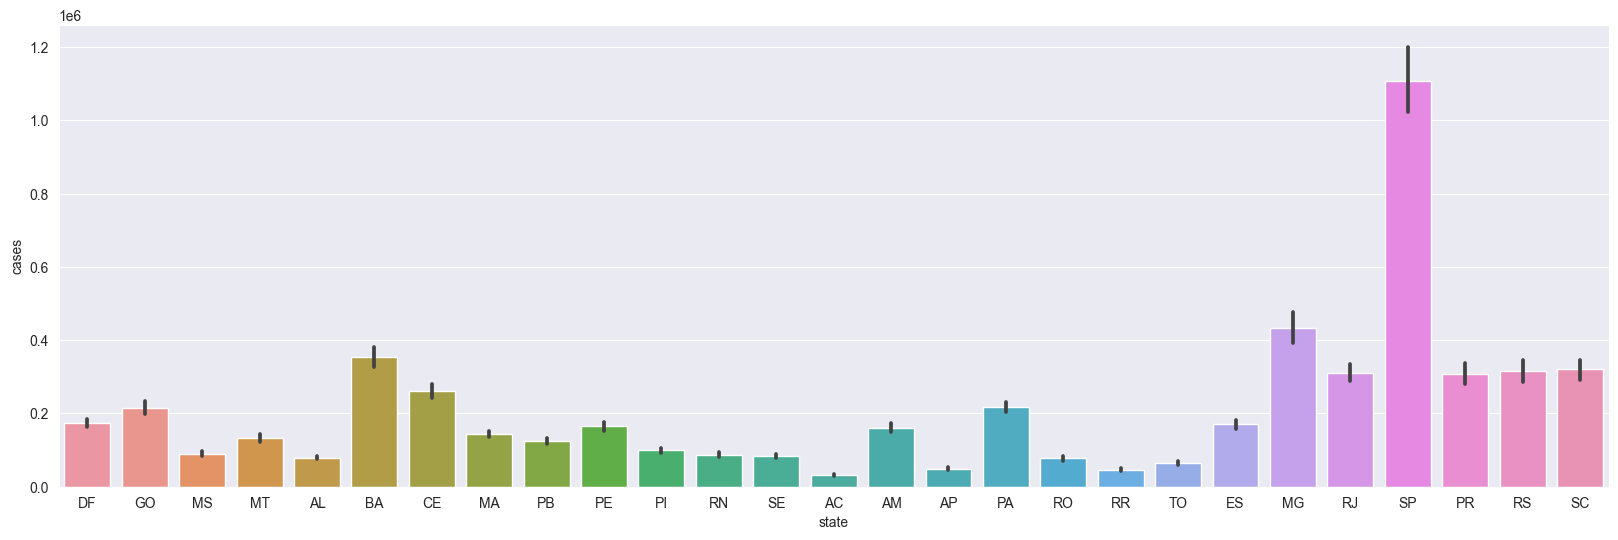

In [46]:
plt.subplots(figsize = (20,6))
sns.barplot(data = df, x = 'state', y= 'cases')

<AxesSubplot: xlabel='state', ylabel='deaths'>

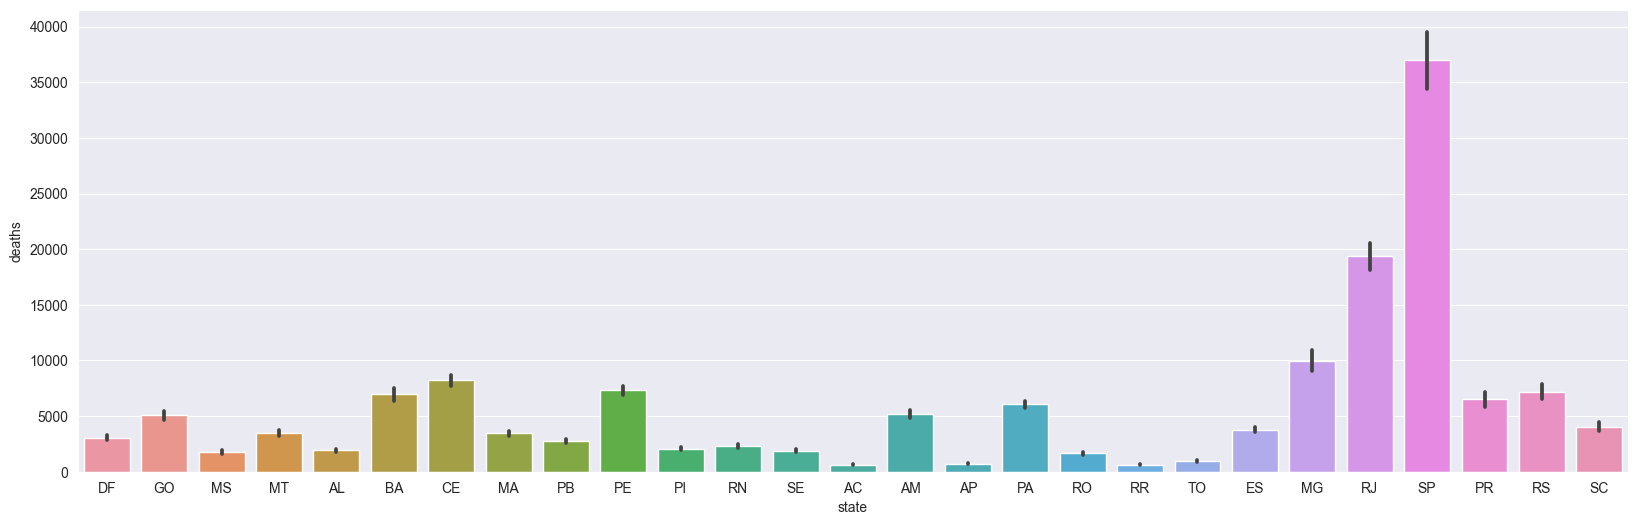

In [47]:
plt.subplots(figsize = (20,6))
sns.barplot(data = df, x = 'state', y= 'deaths')

<AxesSubplot: xlabel='date', ylabel='cases'>

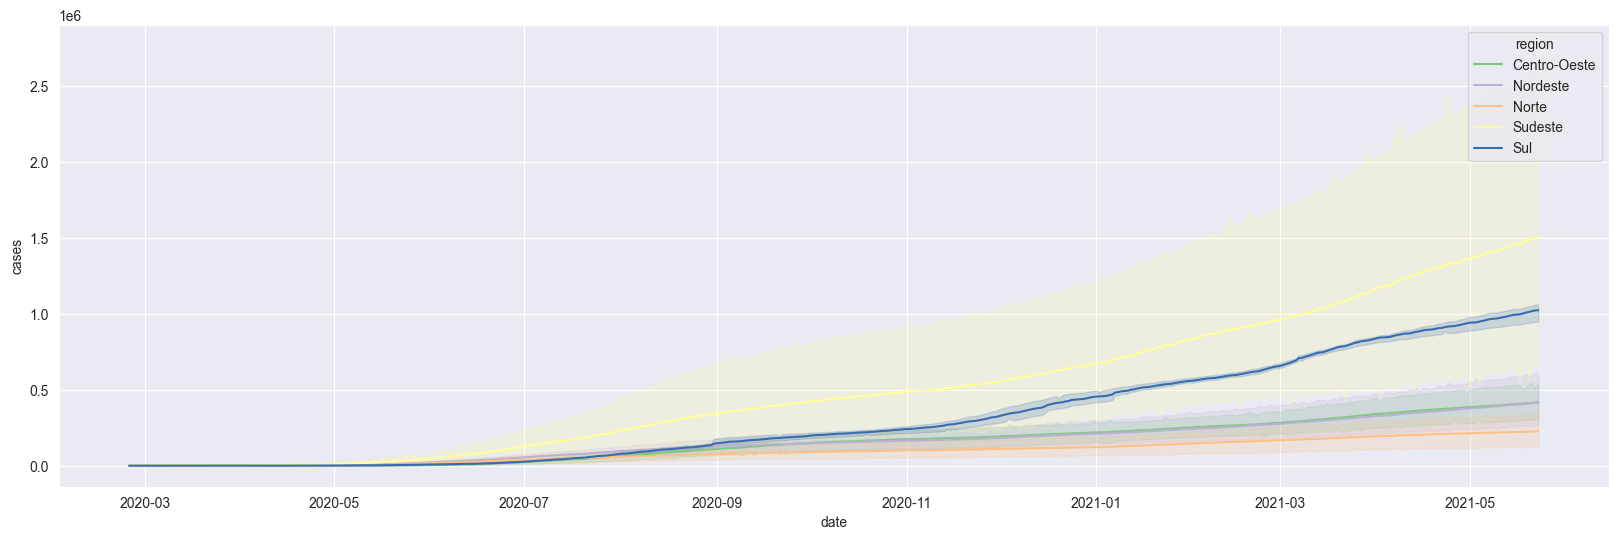

In [35]:
plt.subplots(figsize = (20,6))
sns.lineplot(data=df, x = 'date', y = 'cases', hue = 'region')

<AxesSubplot: xlabel='date', ylabel='deaths'>

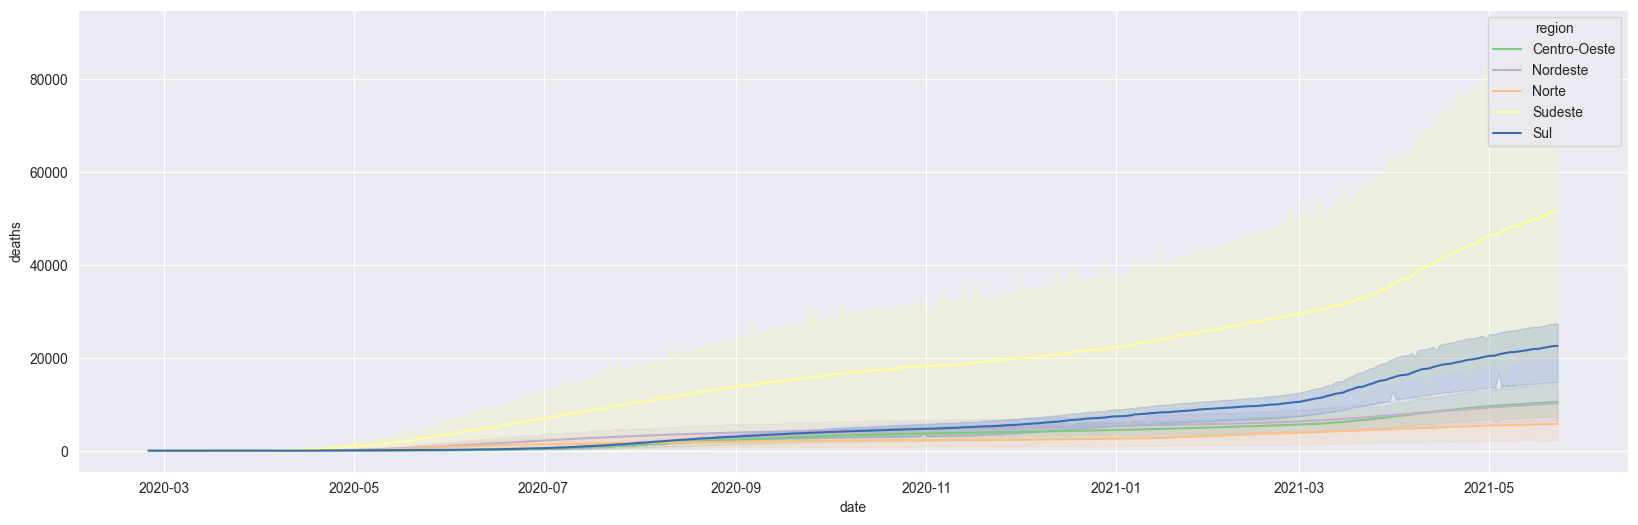

In [36]:
plt.subplots(figsize = (20,6))
sns.lineplot(data=df, x = 'date', y = 'deaths', hue = 'region')

<AxesSubplot: xlabel='date', ylabel='cases'>

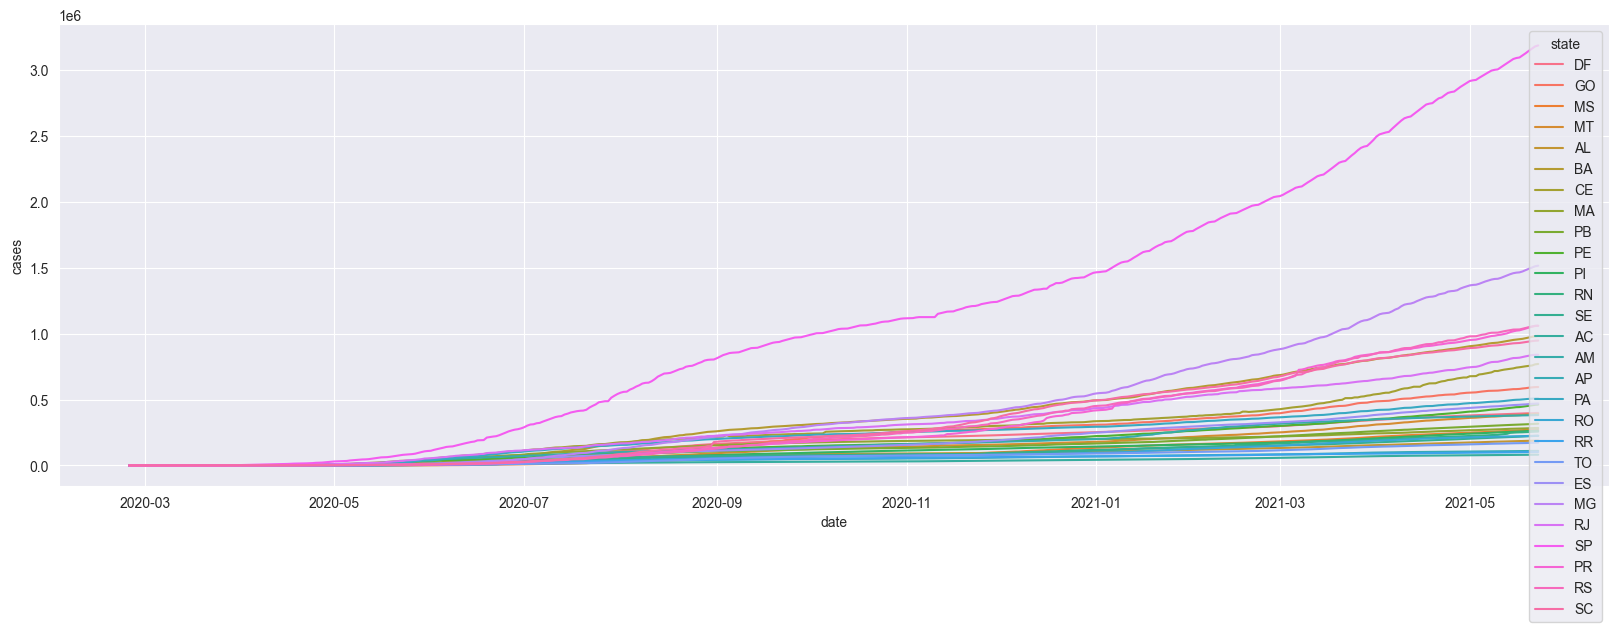

In [50]:
plt.subplots(figsize = (20,6))
sns.lineplot(data=df, x = 'date', y = 'cases', hue = 'state')

<AxesSubplot: xlabel='date', ylabel='deaths'>

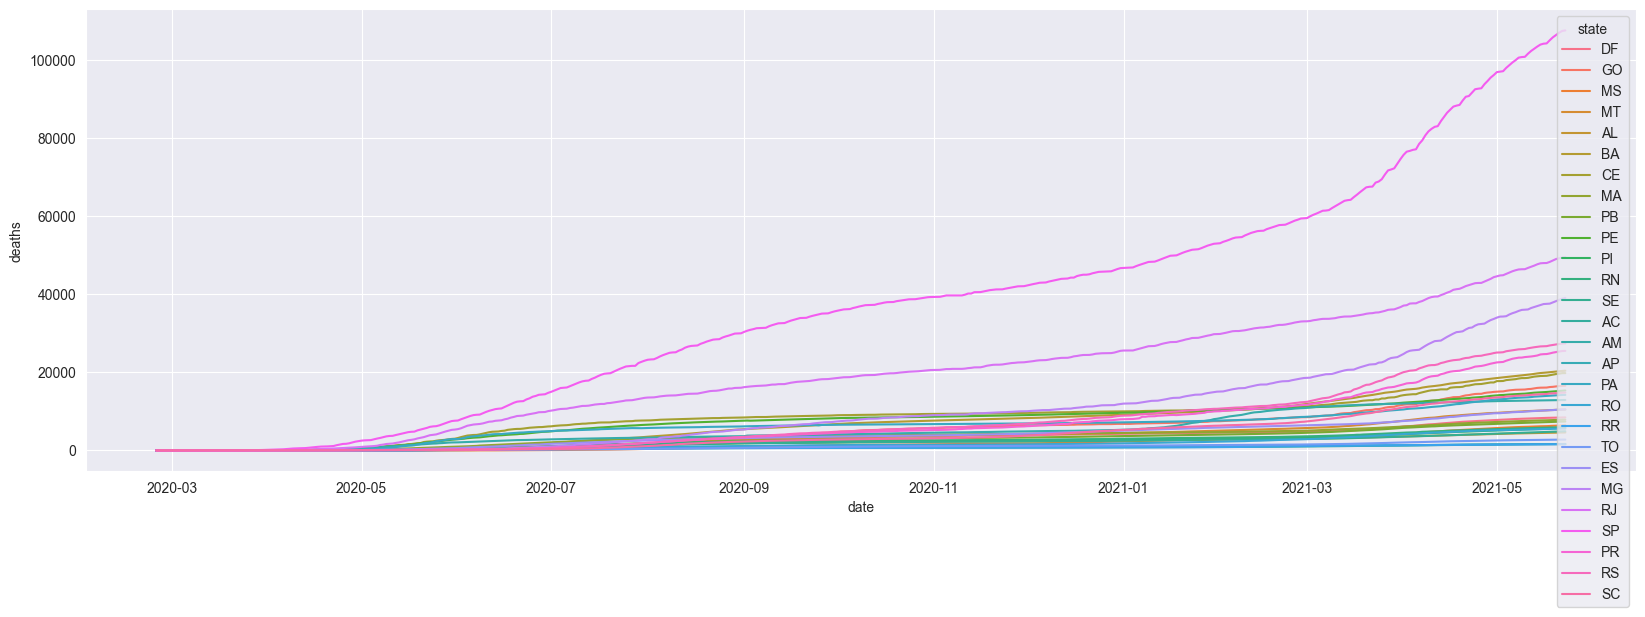

In [51]:
plt.subplots(figsize = (20,6))
sns.lineplot(data=df, x = 'date', y = 'deaths', hue = 'state')

In [56]:
df.head()

,date,region,state,cases,deaths,month,year,increase_cases,acceleration_cases,increase_deaths,acceleration_deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0,2,2020,NaN,NaN,NaN,NaN
1,2020-02-25,Centro-Oeste,GO,0.0,0,2,2020,0.0,NaN,0.0,NaN
2,2020-02-25,Centro-Oeste,MS,0.0,0,2,2020,0.0,0.0,0.0,0.0
3,2020-02-25,Centro-Oeste,MT,0.0,0,2,2020,0.0,0.0,0.0,0.0
4,2020-02-25,Nordeste,AL,0.0,0,2,2020,0.0,0.0,0.0,0.0


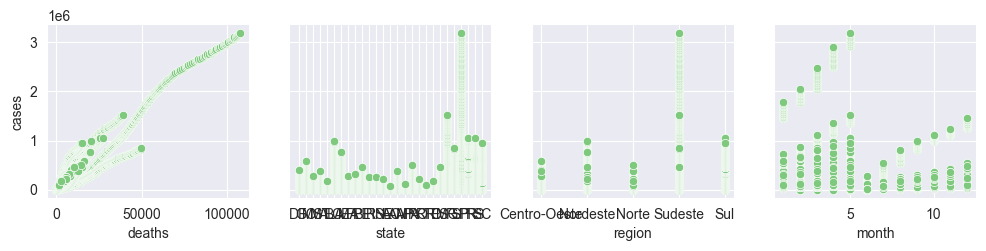

In [66]:
sns.pairplot(df, y_vars='cases', x_vars=['deaths', 'state', 'region', 'month'])

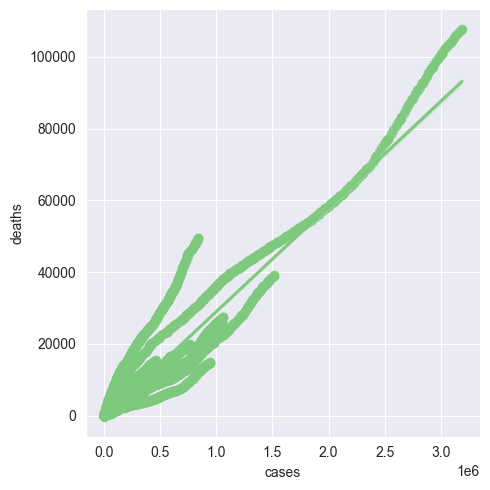

In [67]:
sns.lmplot(x = 'cases', y = 'deaths', data = df)

In [70]:
y = df['cases']

In [79]:
X = df[['deaths', 'month']]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [81]:
X_train.shape

(8580, 2)

In [82]:
modelo = LinearRegression()

In [83]:
modelo.fit(X_train, y_train)

LinearRegression()

In [84]:
print("R^2 = {}".format(modelo.score(X_train, y_train).round(2)))

R^2 = 0.89


In [85]:
y_previsto = modelo.predict(X_test)

In [86]:
print('R^2 = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R^2 = 0.876
